
# K Means-SMOTE
Machine Learning with Imbalanced Data - Course

Creates new samples by interpolation of samples with SMOTE within selected clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from imblearn.over_sampling import KMeansSMOTE

## Create data

In [2]:
# config options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (0, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 2100

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas columns
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# different number of samples per blob
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(400, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

# reset indexes
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

             
# create imbalanced target
y = pd.concat([
    pd.Series(np.random.binomial(1, 0.3, 700)),
    pd.Series(np.random.binomial(1, 0.2, 400)),
    pd.Series(np.random.binomial(1, 0.1, 100)),
], axis=0).reset_index(drop=True)

# display size
X.shape, y.shape

((1200, 2), (1200,))

In [3]:
y.value_counts()

0    906
1    294
Name: count, dtype: int64

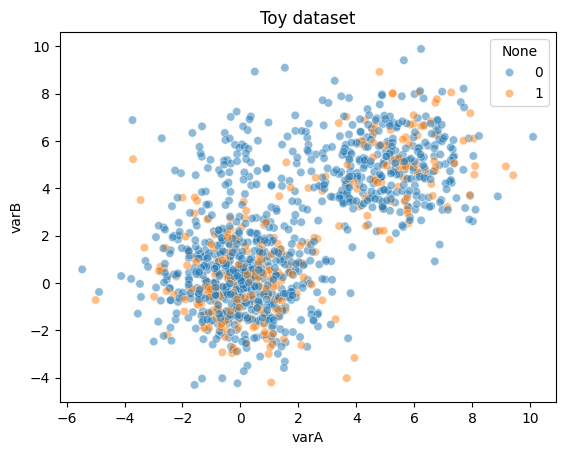

In [4]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## KMeans SMOTE

In [5]:
sm = KMeansSMOTE(
    sampling_strategy='auto',   # samples only the minority class
    random_state=0,
    k_neighbors=2,
    kmeans_estimator=KMeans(n_clusters=3, random_state=0),
    cluster_balance_threshold=0.1,
    density_exponent='auto',
)

X_res, y_res = sm.fit_resample(X, y)

In [6]:
# size of original data
X.shape, y.shape

((1200, 2), (1200,))

In [7]:
# size of oversampled data
X_res.shape, y_res.shape

((1813, 2), (1813,))

In [8]:
# number of minority class obs
y.value_counts(), y_res.value_counts()

(0    906
 1    294
 Name: count, dtype: int64,
 1    907
 0    906
 Name: count, dtype: int64)

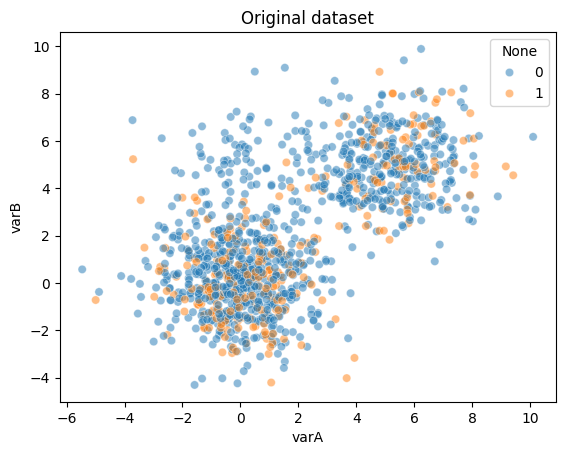

In [9]:

# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

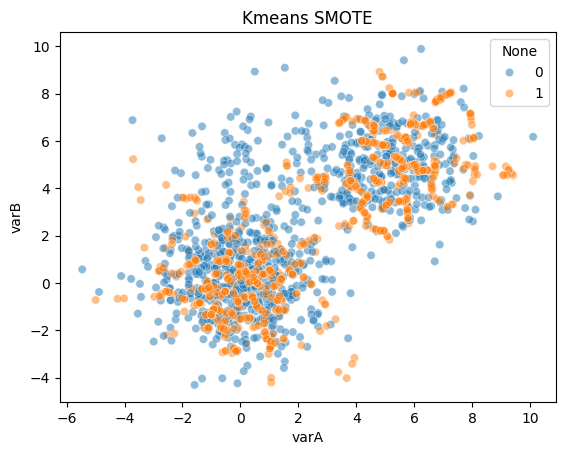

In [11]:

# plot of oversampled data

sns.scatterplot(
    data=X_res, x="varA", y="varB", hue=y_res, alpha=0.5
)

plt.title('Kmeans SMOTE')
plt.show()